In [1]:
import supereeg as se
import pandas as pd
import numpy as np
import os
import hypertools as hyp
import plot as plot
from scipy import stats
import matplotlib
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import plotting as ni_plt

In [2]:
fig_dir = '../../paper/figs/source/supplemental_2'

In [3]:
ram_data_dir = '../../data/ram'
pyfr_data_dir = '../../data/pyfr'

In [4]:
fig_count = 0

# PyFR analysis

In [5]:
pyFR_df = pd.read_csv(os.path.join(pyfr_data_dir, 'pyfr.csv'), index_col=0)

In [6]:
pyFR_df.head()

,across,within,Subject,R,Sample rate,Samples,Thresholded electrodes,Sessions,Number thresholded,Total time (h),Average session length (h),Total electrodes,Proportion thresholded
0,0.844742,0.639768,31,[-63.64 -21.93 5.37],250.0,3465000,10,7.0,42,3.850,0.550,52,0.808
1,0.861268,0.640264,8,[-48.48 38.4 17.26],250.0,1549237,121,2.0,2,1.721,0.860,123,0.016
2,0.665390,0.519857,13,[ 49.49 -34.7 35.17],250.0,2454000,44,4.0,79,2.727,0.682,123,0.642
3,0.641038,0.445575,52,[ 65.66 -67.29 25.83],250.0,3600000,82,2.0,16,4.000,2.000,98,0.163
4,0.764453,0.504416,25,[-36.36 -1.81 59.76],250.0,447750,98,1.0,2,0.498,0.498,100,0.020


## average session length

In [7]:
pyFR_df['Average session length (h)'].min()

0.244

In [8]:
pyFR_df['Average session length (h)'].max()

3.0

## total time

In [9]:
pyFR_df['Total time (h)'].min()

0.28600000000000003

In [10]:
pyFR_df['Total time (h)'].max()

14.208

## z-transform to group by patient

In [11]:
pyFR_df['within'] = plot.r2z(pyFR_df['within'])
pyFR_df['across'] = plot.r2z(pyFR_df['across'])

In [12]:
grouped_results_pyfr = pyFR_df.groupby('Subject')['within', 'across', 'Sample rate', 'Samples', 
                                                  'Sessions', 'Number thresholded', 'Total time (h)', 'Average session length (h)', 
                                                  'Total electrodes', 'Proportion thresholded'].mean()

In [13]:
grouped_results_pyfr.head()

,within,across,Sample rate,Samples,Sessions,Number thresholded,Total time (h),Average session length (h),Total electrodes,Proportion thresholded
Subject,,,,,,,,,,
0,0.230378,0.836986,250.0,840750,2.0,10,0.934,0.467,64,0.156
1,0.493274,0.845447,250.0,1140710,1.0,12,1.267,1.267,40,0.300
2,0.494813,0.869945,250.0,1358998,2.0,53,1.510,0.755,96,0.552
3,0.349534,0.659999,250.0,2999442,2.0,5,3.333,1.666,16,0.312
4,0.426080,0.676345,250.0,2428415,3.0,4,2.698,0.899,64,0.062


In [14]:
grouped_results_pyfr.shape

(67, 10)

## plot correlation by different data features

(-0.3191927497236319, 0.008468566782741575)


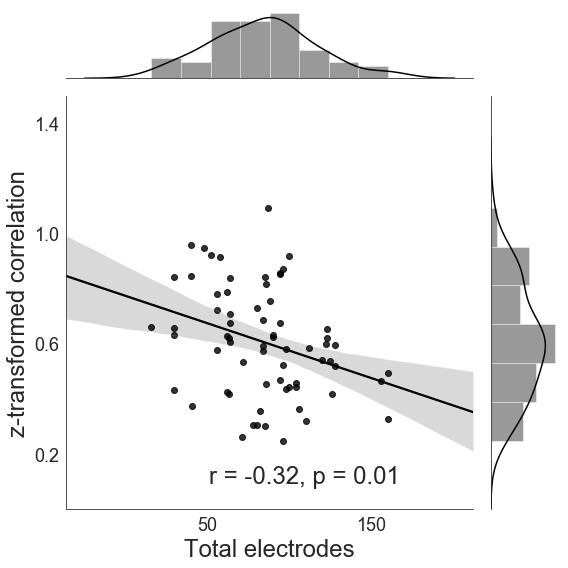

In [15]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_contour(grouped_results_pyfr, 'Total electrodes', 'across', outfile=outfile)

(0.14438569768606327, 0.24372481210690586)


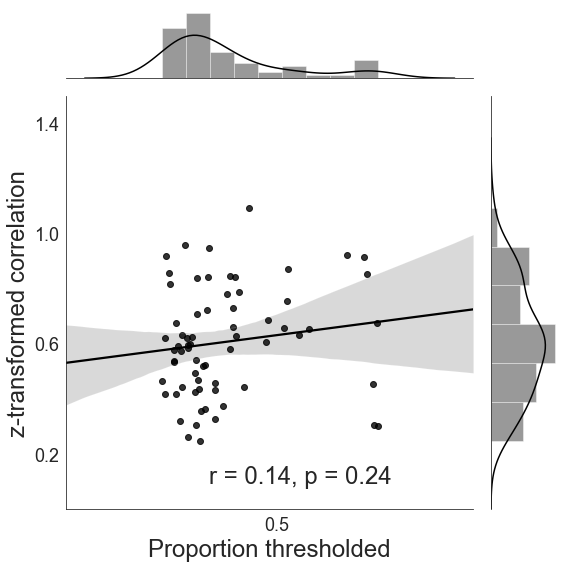

In [16]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_contour(grouped_results_pyfr, 'Proportion thresholded', 'across', outfile=outfile)

(0.1996543828363456, 0.10526631893831795)


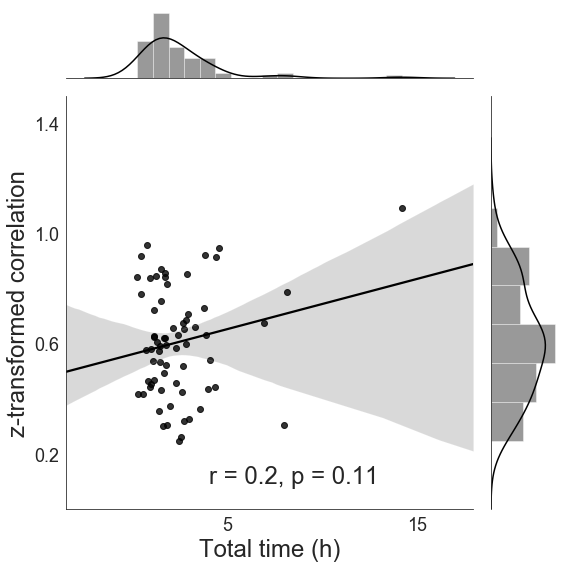

In [17]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_contour(grouped_results_pyfr, 'Total time (h)','across', outfile=outfile)

(0.03428791766696787, 0.782964401352076)


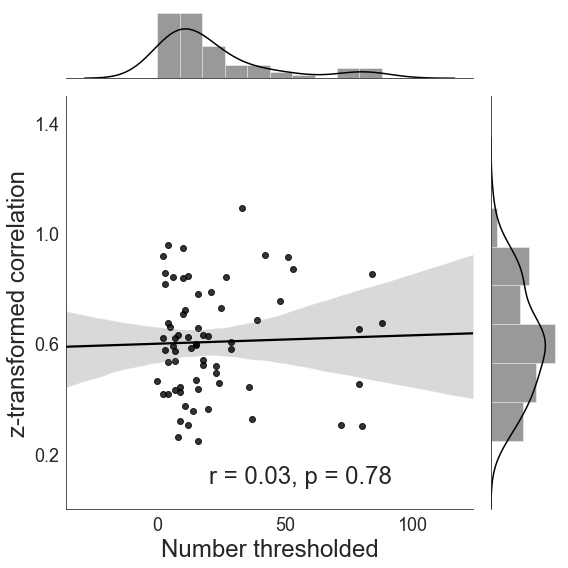

In [18]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_contour(grouped_results_pyfr,'Number thresholded', 'across', title='Number Thresholded', outfile=outfile)

(0.21174485196997606, 0.0854045912720796)


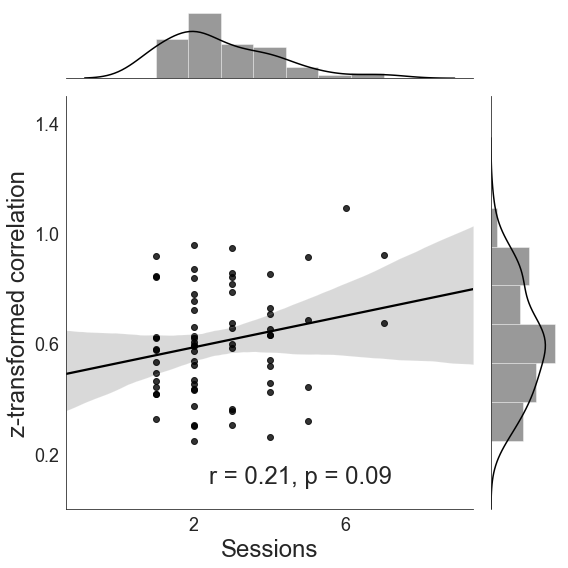

In [19]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_contour(grouped_results_pyfr,'Sessions', 'across', outfile=outfile)

(-0.08970466814711804, 0.4703537702889562)


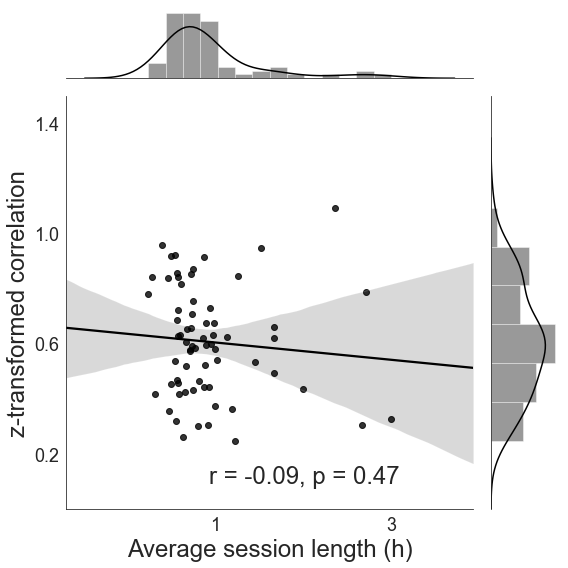

In [20]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_contour(grouped_results_pyfr,'Average session length (h)', 'across', outfile=outfile)

# RAM

In [21]:
RAM_df = pd.read_csv(os.path.join(ram_data_dir, 'ram.csv'), index_col=0)

In [22]:
RAM_df.shape

(3159, 20)

In [23]:
RAM_df['W_w_w'] = plot.r2z(RAM_df['W_w_w'])
RAM_df['W_a_w'] = plot.r2z(RAM_df['W_a_w'])
RAM_df['W_a_all'] = plot.r2z(RAM_df['W_a_all'])
RAM_df['W_a_a'] = plot.r2z(RAM_df['W_a_a'])
RAM_df['W_w_all'] = plot.r2z(RAM_df['W_w_all'])
RAM_df['W_w_a'] = plot.r2z(RAM_df['W_w_a'])

grouped_results_ram = RAM_df.groupby('Subject')['W_w_w', 'W_w_a', 'W_w_all', 'W_a_w', 'W_a_a','W_a_all', 'Sample rate', 'Samples', 
                                                  'Sessions', 'Number thresholded', 'Total time (h)', 'Average session length (h)', 
                                                  'Total electrodes', 'Proportion thresholded'].mean()

grouped_results_ram.head()

,W_w_w,W_w_a,W_w_all,W_a_w,W_a_a,W_a_all,Sample rate,Samples,Sessions,Number thresholded,Total time (h),Average session length (h),Total electrodes,Proportion thresholded
Subject,,,,,,,,,,,,,,
0,0.219335,0.227032,0.188312,0.824195,0.312150,0.815626,250.0,8.026894e+05,1.484848,21.424242,0.891848,0.637303,104.000000,0.206273
1,0.086401,0.049168,0.073796,0.505154,0.363341,0.490492,250.0,1.716483e+06,2.391304,15.956522,1.907116,0.822362,120.000000,0.132971
2,0.091786,0.468861,0.138985,1.185209,0.548432,0.760054,250.0,1.056302e+06,1.432039,13.961165,1.173971,0.835684,120.000000,0.116010
3,0.089896,0.138021,0.139651,0.607879,0.375316,0.575043,250.0,2.596724e+06,2.495652,24.843478,2.885513,0.904522,86.000000,0.289009
4,0.412031,0.294355,0.138055,1.435772,0.459055,0.880029,250.0,1.885163e+06,1.804469,33.055866,2.094525,1.495196,125.977654,0.266698


## session lengths

In [24]:
grouped_results_ram['Average session length (h)'].min()

0.5537851851851836

In [25]:
grouped_results_ram['Average session length (h)'].max()

1.9499420289855092

## total time

In [26]:
grouped_results_ram['Total time (h)'].min()

0.8135777777777758

In [27]:
grouped_results_ram['Total time (h)'].max()

4.321994923857858

## plot correlation by different data features

(0.03709325905553136, 0.863376966431979)


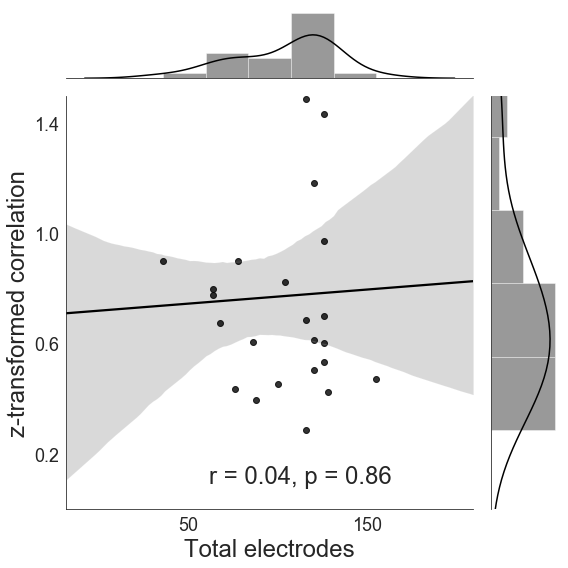

In [28]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_contour(grouped_results_ram, 'Total electrodes', 'W_a_w', outfile=outfile)

(-0.3154733198902164, 0.13318904205283377)


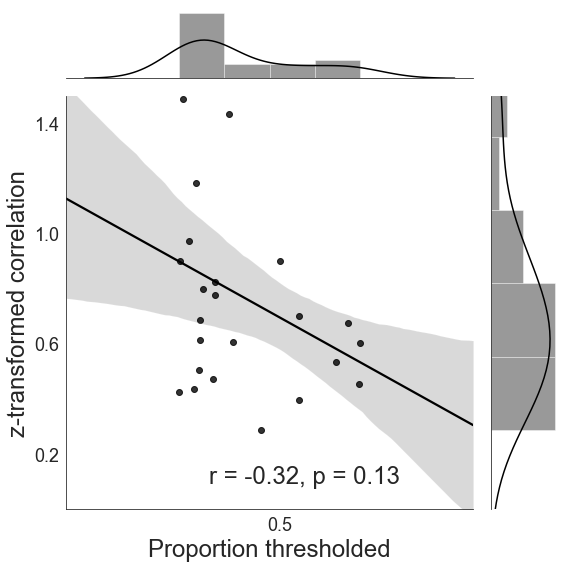

In [29]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_contour(grouped_results_ram, 'Proportion thresholded', 'W_a_w', outfile=outfile)

(-0.11454502492353284, 0.5940634491953609)


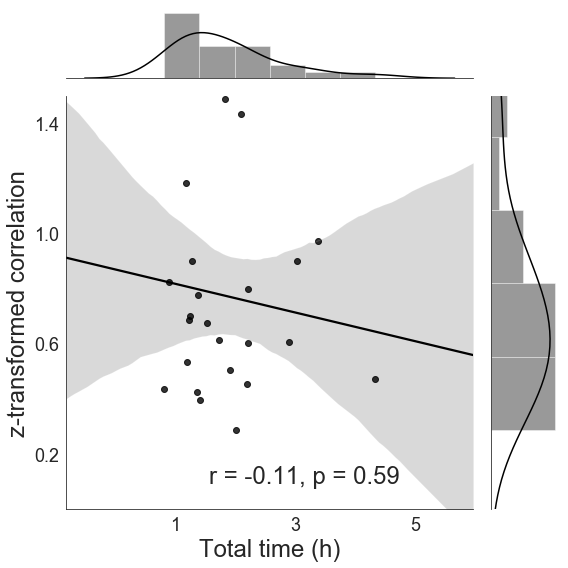

In [30]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_contour(grouped_results_ram, 'Total time (h)', 'W_a_w', outfile=outfile)

(-0.292671534499447, 0.16517925116278756)


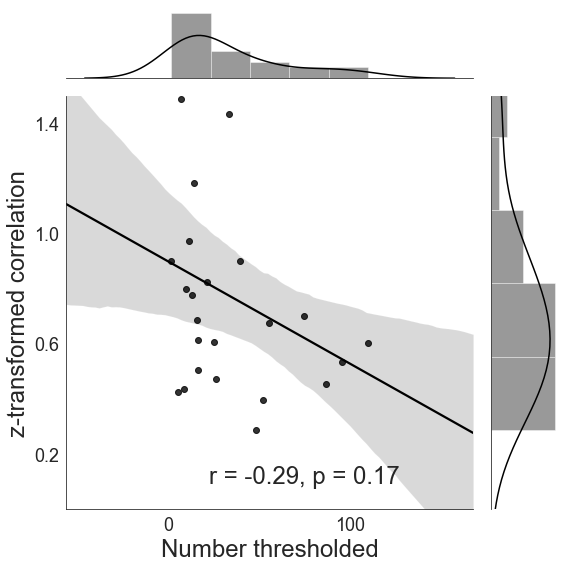

In [31]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_contour(grouped_results_ram,'Number thresholded', 'W_a_w', outfile=outfile)

(-0.19429241828895938, 0.36296276287091156)


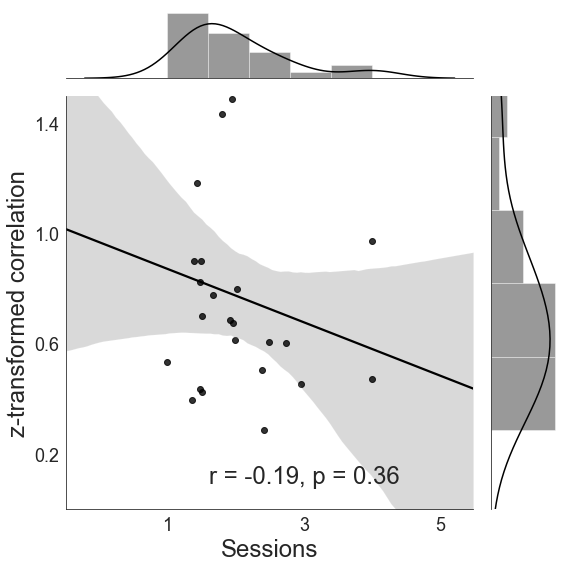

In [32]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_contour(grouped_results_ram, 'Sessions', 'W_a_w', outfile=outfile)

(0.16234075446713636, 0.44851285438799016)


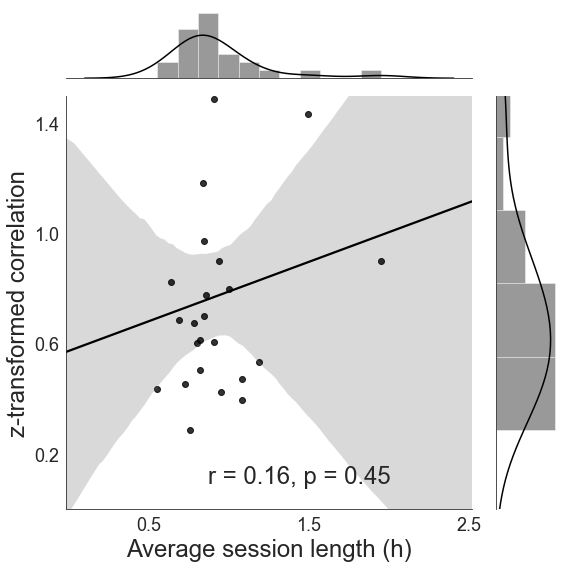

In [33]:
fig_count +=1
outfile = os.path.join(fig_dir, str(fig_count) + '.pdf')
plot.plot_contour(grouped_results_ram, 'Average session length (h)', 'W_a_w', title='Proportion Thresholded', outfile=outfile)